In [1]:
import cv2

In [2]:
from matplotlib import pyplot as plt

In [3]:
from PIL import Image, ImageFilter

In [4]:
%matplotlib inline

In [5]:
import os
os.listdir()

['.ipynb_checkpoints',
 'cameraman.tif',
 'cheetah.png',
 'CMI_Assignment1.pdf',
 'einstein.jpg',
 'hill.png',
 'image1.jpeg',
 'images.jpg',
 'parrot.png',
 'Untitled.ipynb']

# Q1

In [23]:
image = cv2.imread('parrot.png')

In [24]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

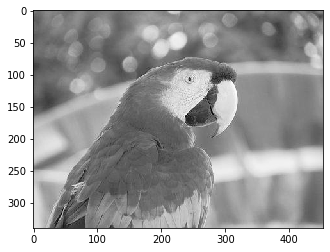

In [25]:
plt.imshow(image, cmap = 'Greys_r')

In [28]:
cv2.imwrite('parrot_grey.png', image)

True

# Q2

In [64]:
einstien = cv2.imread('einstein.jpg')

In [65]:
einstien = cv2.cvtColor(einstien, cv2.COLOR_BGR2GRAY)

In [66]:
einstien.size

388800

In [67]:
einstien.shape

(720, 540)

In [68]:
einstien.dtype

dtype('uint8')

In [39]:
 einstien = einstien.astype('float64')

In [45]:
einstien.dtype

dtype('float64')

In [53]:
def linear_transform(im):
    max_val = im.max()
    min_val = im.min()
    scaled = (im-min_val)/max_val
    return scaled

In [69]:
einstien_linearized = linear_transform(einstien)

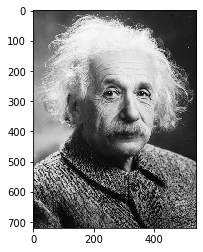

In [70]:
plt.imshow(einstien_linearized*255, cmap = 'Greys_r')

In [63]:
cv2.imwrite('einstien_linearized.jpg', einstien_linearized*255)

True

In [74]:
import numpy as np

In [75]:
A = np.array([1,2,3])

In [77]:
matrix = np.diag(A)

In [85]:
np.pad(matrix, ((2,2),(1,1)), mode = 'constant')

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

# Q4

In [86]:
def padding_function(array, padding_shape, padding_mode):
    #for greyscale images
    if len(array.shape)==2:
        return np.pad(array, padding_shape, padding_mode)
    #for rgb images
    if len(array.shape) ==3:
        return np.stack([np.pad(parrot[:,:,c], ((5,5), (5,5)), mode = 'constant') for c in range(3)], axis =2)



In [88]:
parrot = cv2.imread('parrot.png')

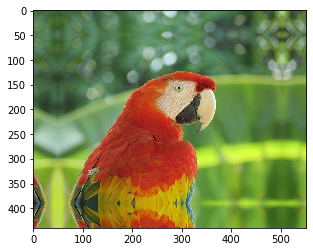

In [124]:
plt.imshow(cv2.cvtColor(np.stack([np.pad(parrot[:,:,c], ((50,50), (50,50)), 
                                         mode = 'symmetric') for c in range(3)],
                                 axis =2), 
                        cv2.COLOR_BGR2RGB))

# Q5

In [125]:
kernel = np.ones((5,5), np.float32)/25

In [138]:
kernel = np.array([[0, -1, 0],
                [-1, 5, -1],
                [0, -1, 0]])

In [139]:
dst = np.stack([cv2.filter2D(parrot_padded[:,:,c], -1, kernel ) for c in range(3)], axis = 2)

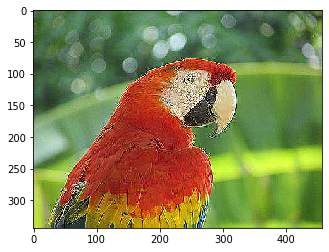

In [143]:
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_RGB2BGR))

In [128]:
parrot_padded = (np.stack([np.pad(parrot[:,:,c], ((2,2), (2,2)), 
                                         mode = 'symmetric') for c in range(3)],
                                 axis =2))

In [134]:
cv2.filter2D(parrot_padded[:,:,1],-1, kernel)

array([[114, 114, 114, ..., 124, 124, 123],
       [114, 114, 115, ..., 123, 123, 123],
       [115, 115, 115, ..., 123, 122, 122],
       ...,
       [222, 222, 223, ..., 185, 184, 184],
       [222, 222, 223, ..., 187, 187, 187],
       [222, 222, 223, ..., 188, 188, 187]], dtype=uint8)